In [17]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df = pd.read_csv('Musical_instruments_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [27]:
print('The amazon musical instrument review dataset contains {} records and {} attributes namely : {}'.format(df.shape[0], df.shape[1],df.columns.str.lower()))

The amazon musical instrument dataset contains 10261 records and 9 attributes namely : Index(['reviewerid', 'asin', 'reviewername', 'helpful', 'reviewtext',
       'overall', 'summary', 'unixreviewtime', 'reviewtime'],
      dtype='object')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [30]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

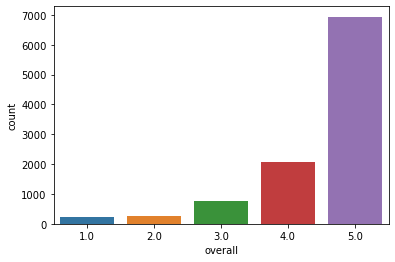

In [34]:
sns.countplot(data.overall)
#plt.xlabel('Overall ratings')

In [35]:
# replacing numerical values with categorical values to reduce the classes to sentiments

df['sentiment_from_overall'] = data.overall.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

In [43]:
df.groupby('sentiment_from_overall').describe()

overall                                               \
                         count      mean       std  min  25%  50%  75%  max   
sentiment_from_overall                                                        
negative                 467.0  1.535332  0.499285  1.0  1.0  2.0  2.0  2.0   
neutral                  772.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   
positive                9022.0  4.769009  0.421490  4.0  5.0  5.0  5.0  5.0   

                       unixReviewTime                              \
                                count          mean           std   
sentiment_from_overall                                              
negative                        467.0  1.362342e+09  3.733258e+07   
neutral                         772.0  1.361718e+09  3.633831e+07   
positive                       9022.0  1.360421e+09  3.794350e+07   

                                                                  \
                                 min           25%           50%   
sentiment_from_overall                                             
negative                1.141344e+09  1.345291e+09  1.370218e+09   
neutral                 1.161389e+09  1.343282e+09  1.369008e+09   
positive                1.095466e+09  1.343434e+09  1.368274e+09   

                                                    
                                 75%           max  
sentiment_from_overall                              
negative                1.389830e+09  1.405210e+09  
neutral                 1.389053e+09  1.405901e+09  
positive                1.388880e+09  1.405987e+09

In [39]:

#Creating Train and Test datasets with only the product reviews (complete Review = reviewtext + summary)

X_data = df['reviewText'] + ' ' + df['summary']
y_data = df['sentiment_from_overall']

In [40]:
# changing the datatype from object to string

X_data = X_data.astype(str)

In [41]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


In [68]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string

[nltk_data] Downloading package stopwords to C:\Users\Saranya Varshni
[nltk_data]     R K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Saranya Varshni R
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Saranya Varshni R
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [51]:
# function for removing punctuations
def remove_punct(X_data_func):
    string1 = X_data_func.lower()
    translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
    string2 = string1.translate(translation_table)
    return string2

In [52]:
# function to remove stopwords
def remove_stopwords(X_data_func):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    string2 = pattern.sub(' ', X_data_func)
    return string2

In [53]:
# function for tokenizing
def tokenize_words(X_data_func):
    words = nltk.word_tokenize(X_data_func)
    return words

In [54]:
# function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lemmatize_words(X_data_func):
    words = lemmatizer.lemmatize(X_data_func)
    return words

In [61]:
# creating functions for text processing

string.punctuation
def final(X_data_full):
    
    
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
   
    
    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)
        
    
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
         # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [70]:
data_X = final(X_data)
X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb


In [74]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [75]:

# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       101
     neutral       0.00      0.00      0.00       206
    positive       0.88      1.00      0.94      2259

    accuracy                           0.88      2566
   macro avg       0.29      0.33      0.31      2566
weighted avg       0.78      0.88      0.82      2566

[[   0    0  101]
 [   0    0  206]
 [   0    0 2259]]
Accuracy :  88.04  %
f1_score :  0.824


C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Instatiation, fitting and predictions

xgb_ = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1)

xgb_.fit(X_train, y_train)
predictions = xgb_.predict(X_test)

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
# Model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

xgb_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
xgb_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , xgb_accuracy , " %")
print("f1_score : " , xgb_f1)

              precision    recall  f1-score   support

    negative       0.56      0.10      0.17       101
     neutral       0.60      0.18      0.28       206
    positive       0.90      0.99      0.94      2259

    accuracy                           0.89      2566
   macro avg       0.68      0.42      0.46      2566
weighted avg       0.86      0.89      0.86      2566

[[  10   10   81]
 [   3   37  166]
 [   5   15 2239]]
Accuracy :  89.09  %
f1_score :  0.86


In [80]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [81]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       101
     neutral       0.61      0.08      0.15       206
    positive       0.89      0.99      0.94      2259

    accuracy                           0.88      2566
   macro avg       0.50      0.36      0.36      2566
weighted avg       0.83      0.88      0.84      2566

[[   0    1  100]
 [   0   17  189]
 [   3   10 2246]]
Accuracy :  88.19  %
f1_score :  0.837


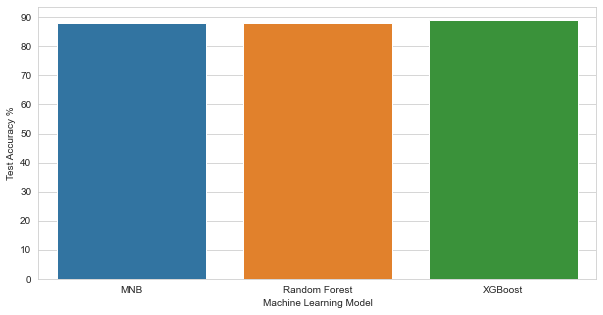

In [82]:
#Comparing the accuracy for various models

model = ['MNB', 'Random Forest', 'XGBoost']
acc = [MNB_accuracy, rfc_accuracy, xgb_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()